<a href="https://colab.research.google.com/github/ZahraMoeini/Regression/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
import math

In [ ]:
link =  "https://raw.githubusercontent.com/ZahraMoeini/Regression/main/Data/kc_house_data.csv"


***Read Data***

In [ ]:
data = pd.read_csv(link, error_bad_lines=False )




***`print shape and show 5 first rows`***

In [ ]:
print(data.shape)
data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


***show null data and show number of null data***

In [ ]:
data.isnull
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

***delete null data***

In [ ]:
 data=data.dropna()

***show feature of each elemane***

In [ ]:
for column in data:
  unique_vals=np.unique(data[column])
  nr_values=len(unique_vals)
  if nr_values<10:
   print('The number of value of feature:{}/{}/{}'.format(column,nr_values,unique_vals))
  else:
   print('The number of value of feature:{}/{}'.format(column,nr_values))

The number of value of feature:id/21436
The number of value of feature:date/372
The number of value of feature:price/4028
The number of value of feature:bedrooms/13
The number of value of feature:bathrooms/30
The number of value of feature:sqft_living/1038
The number of value of feature:sqft_lot/9782
The number of value of feature:floors/6/[1.  1.5 2.  2.5 3.  3.5]
The number of value of feature:waterfront/2/[0 1]
The number of value of feature:view/5/[0 1 2 3 4]
The number of value of feature:condition/5/[1 2 3 4 5]
The number of value of feature:grade/12
The number of value of feature:sqft_above/946
The number of value of feature:sqft_basement/306
The number of value of feature:yr_built/116
The number of value of feature:yr_renovated/70
The number of value of feature:zipcode/70
The number of value of feature:lat/5034
The number of value of feature:long/752
The number of value of feature:sqft_living15/777
The number of value of feature:sqft_lot15/8689


***visualising a subset of our data***

In [ ]:
pairplot1=True
if pairplot1==True:
 g=sns.pairplot(data)

***visualising a subset of our data/important feature***

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
pairplot2=True
if pairplot2==True:
  g=sns.pairplot(data[['price','sqft_living','condition']])

In [ ]:
pairplot3=True
if pairplot3==True:
  g=sns.pairplot(data[['price','sqft_living','condition']],hue='condition')

In [ ]:
lmplot1=True
if lmplot1==True:
  g=sns.lmplot(x='price',y='sqft_living',data=data)

In [ ]:
lmplot2=False
if lmplot2==True:
  g=sns.lmplot(x='price',y='sqft_living',data=data, col='floors')

In [ ]:
lmplot3=False
if lmplot3==True:
  g=sns.lmplot(x='price',y='sqft_living',data=data, col='floors',col_wrap=3,height=5,scatter_kws={'color':'green'})

In [ ]:
lmplot=True
if lmplot==True:
 g=sns.lmplot(x='price',y='sqft_living',data=data, col='floors',col_wrap=3,height=5,scatter_kws={'color':'green'},ci=False)

In [ ]:
boxplot=True
if boxplot==True:
 pal=['green','red']
 g=sns.boxplot(x='price',y='sqft_living',data=data,hue='waterfront',palette=pal)

***cleaning data***

In [ ]:
data.shape[0]

21613

In [ ]:
data[data['floors']>3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
10077,1972202010,20140801T000000,435000.0,3,3.00,1440,1350,3.5,0,2,3,8,1440,0,2005,0,98103,47.6525,-122.345,1440,1350
11594,3180100023,20150130T000000,544000.0,3,2.50,1760,1755,3.5,0,0,3,8,1760,0,1998,0,98105,47.6688,-122.279,1700,1721
14885,8673400177,20150402T000000,525000.0,3,3.00,1730,1074,3.5,0,0,3,8,1730,0,2006,0,98107,47.6692,-122.392,1370,1185
15424,1702900664,20150416T000000,479000.0,2,2.50,1730,1037,3.5,0,0,3,8,1730,0,2008,0,98118,47.5594,-122.285,1280,1026
18477,1346300150,20141020T000000,3300000.0,8,4.00,7710,11750,3.5,0,0,5,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325
20308,1972200426,20140918T000000,525000.0,2,2.75,1310,1268,3.5,0,0,3,8,1310,0,2007,0,98103,47.6534,-122.355,1350,1288
20772,1972200428,20140625T000000,563500.0,3,2.50,1400,1312,3.5,0,0,3,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312


In [ ]:
data1=data[data['floors']<=3]
data.shape[0]

21613

In [ ]:
data[data['floors']>3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
10077,1972202010,20140801T000000,435000.0,3,3.00,1440,1350,3.5,0,2,3,8,1440,0,2005,0,98103,47.6525,-122.345,1440,1350
11594,3180100023,20150130T000000,544000.0,3,2.50,1760,1755,3.5,0,0,3,8,1760,0,1998,0,98105,47.6688,-122.279,1700,1721
14885,8673400177,20150402T000000,525000.0,3,3.00,1730,1074,3.5,0,0,3,8,1730,0,2006,0,98107,47.6692,-122.392,1370,1185
15424,1702900664,20150416T000000,479000.0,2,2.50,1730,1037,3.5,0,0,3,8,1730,0,2008,0,98118,47.5594,-122.285,1280,1026
18477,1346300150,20141020T000000,3300000.0,8,4.00,7710,11750,3.5,0,0,5,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325
20308,1972200426,20140918T000000,525000.0,2,2.75,1310,1268,3.5,0,0,3,8,1310,0,2007,0,98103,47.6534,-122.355,1350,1288
20772,1972200428,20140625T000000,563500.0,3,2.50,1400,1312,3.5,0,0,3,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312


***selecting usefull data only***

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
data=data[['price','bedrooms','sqft_living','floors','condition']]

In [ ]:
data.head()

,price,bedrooms,sqft_living,floors,condition
0,221900.0,3,1180,1.0,3
1,538000.0,3,2570,2.0,3
2,180000.0,2,770,1.0,3
3,604000.0,4,1960,1.0,5
4,510000.0,3,1680,1.0,3


***making categorical variable into numeric representation***

In [ ]:
dummies=False
if dummies==True:
 data=pd.get_dummies(data,columns=['date'])

In [ ]:
data.head()

,price,bedrooms,sqft_living,floors,condition
0,221900.0,3,1180,1.0,3
1,538000.0,3,2570,2.0,3
2,180000.0,2,770,1.0,3
3,604000.0,4,1960,1.0,5
4,510000.0,3,1680,1.0,3


***feature sealection***

2 ways to help us select the important features are:

1.   Correlation
2.   Feature importance  



Correlation:


In [ ]:
data.columns


Index(['price', 'bedrooms', 'sqft_living', 'floors', 'condition'], dtype='object')

In [ ]:
hm=data[['price', 'bedrooms', 'sqft_living', 'floors', 'condition',]].corr()

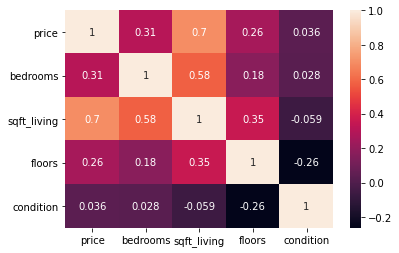

In [ ]:
g=sns.heatmap(hm,annot=True,annot_kws={'size':10})

Feature importance:
1. split the data into X,Y
2. Run a Tree-based estimators(i.e.decision Trees& random forests)
3. Run Feature importance

In [ ]:
x=data.drop('price',axis=1).values
y=data['price']
dt=DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth=10)
dt.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

***Running feature Importance***

In [ ]:
for i,column in enumerate(data.drop('price',axis=1)):
  print('The Feature importance for {} is:{:.3f}'.format(column, dt.feature_importances_[i]))

The Feature importance for bedrooms is:0.065
The Feature importance for sqft_living is:0.786
The Feature importance for floors is:0.077
The Feature importance for condition is:0.071


***Splitting the Raw Data - Hold-out validation***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 4)
(4323, 4)
(17290,)
(4323,)


check if there is a relationship between the variables-
Graphical Anscombe's_quartet 

In [ ]:
features=data.columns
features

Index(['price', 'bedrooms', 'sqft_living', 'floors', 'condition'], dtype='object')

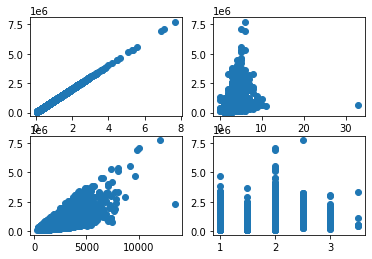

In [ ]:
fig, axs = plt.subplots(int(len(features)/2), 2)
k=0
for i in range(int(len(features)/2)):
  axs[i, 0].scatter(data[features[k]], data['price'])
  axs[i, 0].xlabel= features[k]
  axs[i, 0].ylabel= 'price'
  k+=1
  axs[i, 1].scatter(data[features[k]], data['price'])
  axs[i, 1].xlabel= features[k]
  axs[i, 1].ylabel= 'price'
  k+=1


***Running Linear Regression***

In [ ]:
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)


***Evaluating the Model***

In [ ]:
print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy n2  on the training dataset is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',math.sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',math.sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)


The Accuracy  on the training dataset is:  0.5152880513577883
The Accuracy n2  on the training dataset is:  0.5152880513577883

The Accuracy  on the testing dataset is:  0.5142851201673966

The RMSE  on the training dataset is:  257052.54388415054
The RMSE  on the testing dataset is:  249876.54111355759

The MAE  on the training dataset is:  169050.31407493283
The MAE  on the testing dataset is:  167328.19910738838

Coefficients:  [-59276.12337873    313.73671995  23369.94699017  54057.73518803]

Intercept:  -131623.2096629599


***Plotting Actuals Vs Predicted***

Text(0.5, 1.0, 'Actuals Vs Predicted Values')

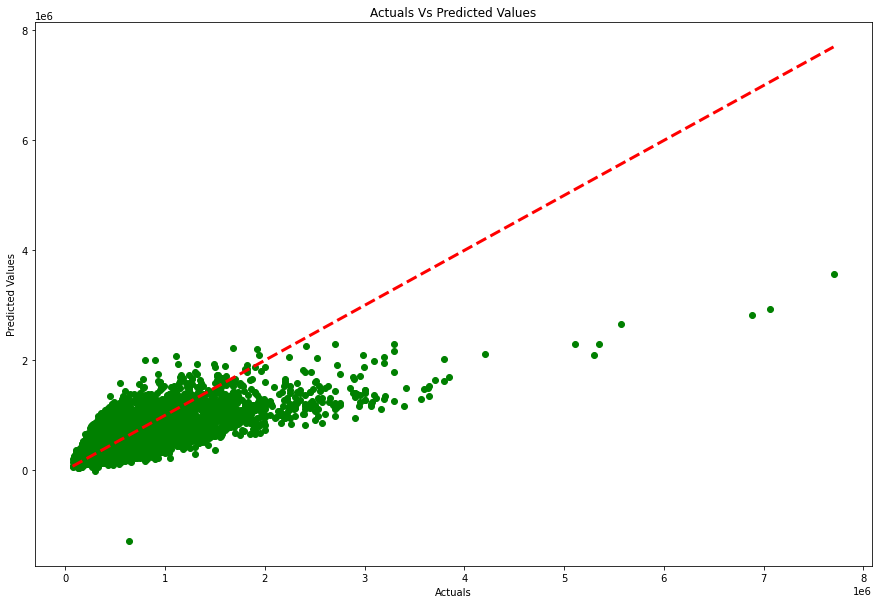

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')